<a href="https://colab.research.google.com/github/Mathmedeiros/Projeto-Analise-de-dados-COVID-19/blob/main/Projeto_Panorama_mundial_do_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 no mundo

COVID-19 é uma doença infecciosa causada pelo recém-descoberto coronavírus. O vírus apareceu pela primeira vez em Dezembro de 2019 na China, e até o momento em que escrevo este texto em 30/08/2021, o número de casos registrados passa de 216 milhões e o total de mortes vai além dos 4,5 milhões de pessoas em todo o mundo, de acordo com o site [Our World in Data](https://ourworldindata.org/).

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, mesmo quase 2 anos após sua descoberta, ainda não se sabe muita coisa a respeito do COVID-19. Estudos vêm sendo realizados no mundo todo, porém até hoje ainda existem grandes mistérios sobre o comportamento do vírus e suas inúmeras variantes.

<center><img alt="Colaboratory logo" width="65%" src="https://guiadoestudante.abril.com.br/wp-content/uploads/sites/4/2020/12/COVID-19.jpg?quality=100&strip=info&resize=680,453"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas têm infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, são classificadas como infecções muito graves e precisam de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Todos já estão carecas de saber sobre os grupos de pessoas mais afetadas, sintomas, variantes e etc. E o objetivo deste projeto não é dar uma aula de história sobre o Covid-19, afinal diversos sites e a própria TV já nos deixaram especialistas no assunto.

Com o intuito de colocar ainda mais em prática meus conhecimentos e desenvolvimento em Data Science irei realizar uma análise dos dados públicos da doença registrados no Brasil. E a partir desta análise tentarei levantar teorias e conclusões sobre o panorama atual do vírus no país.

## Obtenção dos Dados

Não posso deixar de mencionar a dificuldade de se obter *datasets* confiáveis sobre o COVID-19, levando em consideração os conflitos existentes entre os dados dos governos federal, estaduais e os não oficiais. Infelizmente este é um vírus muito recente, logo não há uma infinidade de bases de dados disponíveis na internet para análise. Mesmo assim fiquei bastante satisfeito com o *dataset* utilizado.

O *dataset* completo do COVID-19 escolhido para este projeto é armazenado e disponibilizado pelo site [Our World in Data](https://ourworldindata.org/). A base de dados é atualizada diariamente e apresenta dados de variáveis como casos confirmados, mortes, pessoas vacinadas, entre outros.

O site e os dados fornecidos são mantidos pela [Johns Hopkins University (JHU)](https://coronavirus.jhu.edu/map.html). Todos os dados e tabelas estruturados em diferentes formatos estão disponíveis para *download* no [Github](https://github.com/owid/covid-19-data/tree/master/public/data). A *database* é atualizada múltiplas vezes ao longo do dia e seu fácil acesso permitiu que milhões de pessoas em todo o mundo acompanhassem o curso e a evolução da pandemia.

*Our World in Data* navega em informações públicas de fontes oficiais. Contamos com números publicados em sites oficiais, em comunicados à imprensa e em contas de redes sociais de autoridades nacionais - geralmente governos, ministérios da saúde ou centros de controle de doenças.


### Dicionário de Variáveis
Neste *dataset* temos um total de 62 variáveis. Para maior facilidade de identificação decidi apresentá-las separando em diferentes grupos de diferentes contextos:

**Região**
* `iso_code` -	ISO 3166-1 alfa-3 - códigos de três letras do país
* `continent` -	Continente da localização geográfica
* `location` -	Localização geográfica

**Casos confirmados**
* `total_cases` - Total de casos confirmados de COVID-19
* `new_cases`	- Novos casos confirmados de COVID-19
* `new_cases_smoothed` - Novos casos confirmados de COVID-19 (corrigido em 7 dias)
* `total_cases_per_million` - Total de casos confirmados de COVID-19 por milhão de pessoas
* `new_cases_per_million` -	Novos casos confirmados de COVID-19 por milhão de pessoas
* `new_cases_smoothed_per_million` - Novos casos confirmados de COVID-19 (corrigido em 7 dias) por milhão de pessoas.

**Mortes confirmadas**
* `total_deaths` -	Total de mortes atribuídas a COVID-19
* `new_deaths` -	Novas mortes atribuídas a COVID-19
* `new_deaths_smoothed`	- Novas mortes atribuídas a COVID-19 (suavizado 7 dias)
* `total_deaths_per_million` -	Total de mortes atribuídas a COVID-19 por milhão de pessoas
* `new_deaths_per_million` -	Novas mortes atribuídas a COVID-19 por milhão de pessoas
* `new_deaths_smoothed_per_million` -	Novas mortes atribuídas a COVID-19 (suavizado por 7 dias) por milhão de pessoas

**Hospital e UTI**
* `icu_patients` -	Número de pacientes COVID-19 em unidades de terapia intensiva (UTI) em um determinado dia
* `icu_patients_per_million` -	Número de pacientes COVID-19 em unidades de terapia intensiva (UTI) em um determinado dia por milhão de pessoas
* `hosp_patients` -	Número de pacientes COVID-19 em hospitais em um determinado dia
* `hosp_patients_per_million` -	Número de pacientes COVID-19 em hospitais em um determinado dia por milhão de pessoas
* `weekly_icu_admissions` -	Número de pacientes COVID-19 recém-admitidos em unidades de terapia intensiva (UTI) em uma determinada semana
* `weekly_icu_admissions_per_million` -	Número de pacientes COVID-19 recém-admitidos em unidades de terapia intensiva (UTI) em uma determinada semana por milhão de pessoas
* `weekly_hosp_admissions` -	Número de pacientes COVID-19 recém-admitidos em hospitais em uma determinada semana
* `weekly_hosp_admissions_per_million` -	Número de pacientes COVID-19 recém-admitidos em hospitais em uma determinada semana por milhão de pessoas

**Respostas de política**
* `stringency_index` -	Índice de Restrição de Resposta do Governo: medida composta com base em 9 indicadores de resposta, incluindo fechamentos de escolas, fechamentos de locais de trabalho e proibições de viagens, redimensionado para um valor de 0 a 100 (100 = resposta mais estrita)

**Taxa de reprodução**
* `reproduction_rate` -	Estimativa em tempo real da taxa efetiva de reprodução (R) do COVID-19.

**Testagem**
* `total_tests` -	Total de testes para COVID-19
* `new_tests` -	Novos testes para COVID-19 (calculado apenas para dias consecutivos)
* `total_tests_per_thousand` -	Total de testes para COVID-19 por 1.000 pessoas
* `new_tests_per_thousand` -	Novos testes para COVID-19 por 1.000 pessoas
* `new_tests_smoothed` -	Novos testes para COVID-19 (suavizado por 7 dias). Para países que não relatam dados de teste diariamente, presumimos que os testes mudaram igualmente diariamente em todos os períodos em que nenhum dado foi relatado. Isso produz uma série completa de números diários, que é então calculada em média ao longo de uma janela contínua de 7 dias
* `new_tests_smoothed_per_thousand` -	Novos testes para COVID-19 (suavizado por 7 dias) por 1.000 pessoas
* `positive_rate` -	A parcela de testes COVID-19 que são positivos, dada como uma média contínua de 7 dias (este é o inverso de tests_per_case)
* `tests_per_case` -	Testes conduzidos por novo caso confirmado de COVID-19, dado como uma média contínua de 7 dias (este é o inverso de Positive_rate)
* `tests_units` -	Unidades usadas pelo local para relatar seus dados de teste

**Vacinas**
* `total_vaccinations` -	Número total de doses de vacinação COVID-19 administradas
* `people_vaccinated` -	Número total de pessoas que receberam pelo menos uma dose de vacina
* `people_fully_vaccinated` -	Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação
* `total_boosters` -	Número total de doses de reforço da vacinação COVID-19 administradas (doses administradas além do número prescrito pelo protocolo de vacinação)
* `new_vaccinations` -	Novas doses de vacinação COVID-19 administradas (calculadas apenas para dias consecutivos)
* `new_vaccinations_smoothed` -	Novas doses de vacinação COVID-19 administradas (suavizadas em 7 dias). Para os países que não relatam dados de vacinação diariamente, presumimos que a vacinação mudou igualmente diariamente em qualquer período em que nenhum dado foi relatado. Isso produz uma série completa de números diários, que é então calculada em média ao longo de uma janela contínua de 7 dias
* `total_vaccinations_per_hundred` -	Número total de doses de vacinação COVID-19 administradas por 100 pessoas na população total
* `people_vaccinated_per_hundred` -	Número total de pessoas que receberam pelo menos uma dose de vacina por 100 pessoas na população total
* `people_fully_vaccinated_per_hundred` -	Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação por 100 pessoas na população total
* `total_boosters_per_hundred` -	Número total de doses de reforço da vacinação COVID-19 administradas por 100 pessoas na população total
* `new_vaccinations_smoothed_per_million` -	Novas doses de vacinação COVID-19 administradas (suavizadas em 7 dias) por 1.000.000 de pessoas na população total

**Outros**
* `date` -	Data de observação
* `population` -	População em 2020
* `population_density` -	Número de pessoas dividido por área terrestre, medido em quilômetros quadrados, ano mais recente disponível
* `median_age` -	Idade média da população, projeção da ONU para 2020
* `aged_65_older` -	Parcela da população com 65 anos ou mais, ano mais recente disponível
* `aged_70_older` -	Parcela da população com 70 anos ou mais em 2015
* `gdp_per_capita` -	Produto interno bruto em paridade de poder de compra (dólares internacionais constantes de 2011), ano mais recente disponível
* `extreme_poverty`	- Parcela da população que vive em pobreza extrema, ano mais recente disponível desde 2010
* `cardiovasc_death_rate` -	Taxa de mortalidade por doenças cardiovasculares em 2017 (número anual de mortes por 100.000 pessoas)
* `diabetes_prevalence` -	Prevalência de diabetes (% da população de 20 a 79 anos) em 2017
* `female_smokers` -	Parcela de mulheres que fumam, ano mais recente disponível
* `male_smokers` -	Proporção de homens que fumam, ano mais recente disponível
* `handwashing_facilities` -	Parcela da população com instalações básicas para lavagem das mãos no local, ano mais recente disponível
* `hospital_beds_per_thousand` -	Leitos hospitalares por 1.000 pessoas, ano mais recente disponível desde 2010
* `life_expectancy` -	Expectativa de vida ao nascer em 2019
* `human_development_index` -	Um índice composto que mede o desempenho médio em três dimensões básicas do desenvolvimento humano - uma vida longa e saudável, conhecimento e um padrão de vida decente. Valores para 2019, importados de [hdr.undp.org](http://hdr.undp.org/en/indicators/137506)
* `excess_mortality` -	Excesso de mortalidade P-score para todas as idades; consulte este [link no Github](https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality) para a definição do P-score e como é calculado


### Importando os dados do COVID-19

In [ ]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# importar o dataset COVID-19 para um DataFrame
data = 'https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv?raw=true'
df = pd.read_csv(data)

## Análise Exploratória dos Dados

Para dar início a análise deste *dataframe* é necessário começar a partir de uma análise inicial de verificação dos dados como: número de entradas, tipo de cada variável, presença de valores ausentes. E então se necessário fazer o devido ajuste ou filtragem das entradas de forma a preparar os dados para uma análise aprofundada.


### Análise Inicial

#### Visualização das 5 primeiras entradas

Para ter uma ideia inicial da organização deste *dataframe* começarei por uma visualização de suas 5 primeiras linhas.

In [ ]:
#Verificação das 5 primeiras linhas do dataframe

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.025,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


#### Tamanho do *DataFrame*

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui.

In [ ]:
print('Número de entradas: ',df.shape[0])

Número de entradas:  114059


Temos um total de 114059 entradas para todas as 62 variáveis listadas.


#### Tipos das Variáveis

É extremamente importante verificar o tipo de cada variável presente no *DataFrame* para saber se todas se encontram no tipo mais adequado. Assim é possível garantir melhores possibilidades para o uso de métodos e funções pré-existentes nas bibliotecas importadas.

In [ ]:
# Verificar o tipo de cada variável

pd.set_option('display.max_rows', None) #método utilizado para que o dtypes exiba todas as variáveis
df.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

Algo que me chama atenção de imediato é o fato de a variável `date` (data) estar estruturada como *object* , que é o nome dado à variáveis reconhecidas como simples linhas de texto. Este formato não é o ideal para uma variável temporal, pois impossibilita o uso de métodos pré-existentes próprios para lidar com tempo.

#### Transformando a variável Date para o formato *datetime*

O ideal a se fazer para a variável `date` é uma conversão para o formato *datetime*, pois o mesmo possibilita a utilização de recursos das bibliotecas importadas da melhor maneira possível. Infelizmente o *Pandas* normalmente não reconhece variáveis de data com o formato *datetime* automaticamente, logo é bem comum se fazer esta conversão manualmente.

A vantagem é que basta uma simples linha de código, pois existe um método *Pandas* próprio para tal conversão, e o mesmo consegue reconhecer datas em diferentes formatos com simples ajustes. Vamos então ajustar a variável para o formato adequado.

In [ ]:
#Conversão date para formato datetime
df.date = pd.to_datetime(df.date)

#Verificando novamente o formato da variável
types = dict(df.dtypes)
print(types['date'])

datetime64[ns]


#### Percentual de valores nulos

Ao visualizar as 5 primeiras entradas do *DataFrame* já foi possível identificar valores nulos (NaN). É preciso garantir que o *dataset* utilizado não possua um grande percentual de valores nulos para que se tenha uma análise saudável, logo a seguir faremos esta checagem do percentual de valores nulos para cada variável em ordem decrescente.

In [ ]:
pd.set_option('display.precision',2) #alterei o pandas para sempre mostrar apenas dois valores após a vírgula
(df.isnull().sum() / df.shape[0] *100).sort_values(ascending=False)

total_boosters                           99.46
total_boosters_per_hundred               99.46
weekly_icu_admissions_per_million        99.02
weekly_icu_admissions                    99.02
weekly_hosp_admissions_per_million       98.26
weekly_hosp_admissions                   98.26
excess_mortality                         96.52
icu_patients_per_million                 89.64
icu_patients                             89.64
hosp_patients_per_million                87.51
hosp_patients                            87.51
new_vaccinations                         82.33
people_fully_vaccinated                  82.24
people_fully_vaccinated_per_hundred      82.24
people_vaccinated                        79.62
people_vaccinated_per_hundred            79.62
total_vaccinations_per_hundred           78.67
total_vaccinations                       78.67
new_vaccinations_smoothed_per_million    61.96
new_vaccinations_smoothed                61.96
total_tests_per_thousand                 56.69
total_tests  

In [ ]:
pd.reset_option('display.precision') #retorna à configuração padrão de exibição de decimais

Pode-se observar que muitas variáveis possuem grande percentual de valores nulos, algumas delas com um percentual próximo de 100%. Provavelmente devido às diferentes metodologias de coleta de dados do COVID-19 entre os diferentes países e regiões, é compreensível que para várias localidades não tenha havido a coleta de dados para determinadas variáveis.

### Análise Mundial

O foco deste projeto é analisar os dados da pandemia no Brasil, porém para simples observação e par dar uso ao *dataset* completo farei algumas análises utilizando todas as entradas para o panorama mundial. 

#### Análise de casos e mortes

Vamos começar apresentando o rank mundial de casos e mortes por COVID-19 na data mais atual. Para isso, antes é preciso descobrir qual a data mais atual do *DataFrame*.

In [ ]:
df.date.tail()

115245   2021-09-03
115246   2021-09-04
115247   2021-09-05
115248   2021-09-06
115249   2021-09-07
Name: date, dtype: datetime64[ns]

Temos que a data mais atual é "2021-09-07".

Algumas entradas do *dataset* apresentam os dados totais em âmbito mundial ou continental, com isso decidi criar outro *DataFrame* apenas com os dados dos países separadamente.

In [ ]:
df_countries = df.copy()
df_countries.drop(df_countries.loc[df_countries.location =='World']. index, axis=0, inplace = True)
df_countries.drop(df_countries.loc[df_countries.location =='Europe']. index, axis=0, inplace = True)
df_countries.drop(df_countries.loc[df_countries.location =='South America']. index, axis=0, inplace = True)
df_countries.drop(df_countries.loc[df_countries.location =='Asia']. index, axis=0, inplace = True)
df_countries.drop(df_countries.loc[df_countries.location =='North America']. index, axis=0, inplace = True)
df_countries.drop(df_countries.loc[df_countries.location =='European Union']. index, axis=0, inplace = True)
df_countries.drop(df_countries.loc[df_countries.location =='Africa']. index, axis=0, inplace = True)
df_countries.drop(df_countries.loc[df_countries.location =='Oceania']. index, axis=0, inplace = True)
df_countries.drop(df_countries.loc[df_countries.location =='European Union']. index, axis=0, inplace = True)

##### Países com maior número de mortes por COVID-19

A seguir temos o ranking com os 10 países com o maior número de mortes e casos de COVID-19, ordenados por número de mortes em ordem decrescente:

In [ ]:
df_countries[['location','total_deaths','total_cases']].loc[df_countries.date =='2021-09-07'].sort_values(by = 'total_deaths', ascending = False)[:10]

,location,total_deaths,total_cases
110864,United States,650645.0,40280001.0
15417,Brazil,584108.0,20914237.0
48701,India,441411.0,33096718.0
68261,Mexico,264541.0,3449295.0
83435,Peru,198568.0,2156451.0
86960,Russia,185447.0,6946922.0
49261,Indonesia,137156.0,4140634.0
110264,United Kingdom,133808.0,7089051.0
52943,Italy,129638.0,4579502.0
23076,Colombia,125378.0,4921410.0


Pode-se observar que os 3 países com o número mais alto de casos e mortes são Estados Unidos, Brasil e Índia. Os mesmos são países com grande extensão territórial e consequentemente altos valores em número de habitantes. É de se esperar que países com índice populacional alto registrem mais casos e mortes do que países com populações menores.

Antes de responsabilizar estes 10 países por terem os números mais altos em casos e mortes por COVID-19 antes é preciso considerar diversos outros fatores como por exemplo: aplicação de testes, população total, questões econômicas e sociais, entre outros.

Para uma análise um pouco mais justa, utilizarei os valores totais de casos e mortes por milhão de pessoas, desta forma a diferença populacional de cada país não interfere nos resultados.

In [ ]:
df_countries[['location','total_deaths_per_million','total_cases_per_million']].loc[df_countries.date =='2021-09-07'].sort_values(by = 'total_deaths_per_million', ascending = False)[:10]

,location,total_deaths_per_million,total_cases_per_million
82649,Peru,5952.383,64642.950
47099,Hungary,3121.600,84472.111
14186,Bosnia and Herzegovina,3039.413,66824.802
77339,North Macedonia,2942.870,86869.154
27476,Czechia,2835.363,156751.615
70044,Montenegro,2824.611,189584.922
16476,Bulgaria,2794.108,67382.666
15273,Brazil,2729.560,97733.075
89248,San Marino,2646.281,157336.078
4720,Argentina,2474.487,114279.288


Para uma visualização mais simples vamos plotar um gráfico de barras para os 5 países com maior número de mortes por COVID-19:

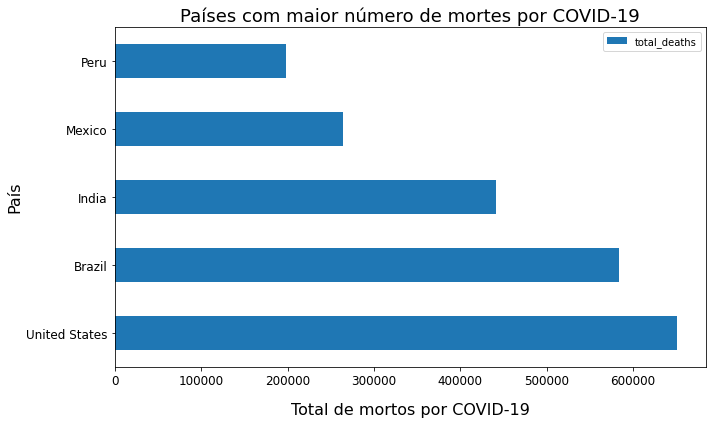

In [ ]:
data_top5 = df_countries.loc[df_countries.date =='2021-09-07'].sort_values(by = 'total_deaths', ascending = False)[:5]

fix, ax = plt.subplots(figsize = (10,6))

data_top5.plot(x = 'location' , y = 'total_deaths', kind = 'barh', ax = ax, fontsize = 12)

ax.set_title('Países com maior número de mortes por COVID-19', fontsize = 18 )
ax.set_xlabel('Total de mortos por COVID-19', fontsize = 16, labelpad= 15)
ax.set_ylabel('País', fontsize = 16)

plt.tight_layout()

##### Países com maior número de casos por COVID-19

A seguir temos o ranking com os 10 países com o maior número de casos de COVID-19 para a data mais atual:

In [ ]:
df_countries[['location','total_deaths','total_cases']].loc[df_countries.date =='2021-09-07'].sort_values(by = 'total_cases', ascending = False)[:10]

,location,total_deaths,total_cases
111493,United States,651294.0,40389635.0
48980,India,441411.0,33096718.0
15495,Brazil,584108.0,20914237.0
110890,United Kingdom,133808.0,7089051.0
87463,Russia,185447.0,6946922.0
38454,France,115680.0,6938866.0
108227,Turkey,58651.0,6542624.0
4783,Argentina,112851.0,5211801.0
50705,Iran,111892.0,5184124.0
23197,Colombia,125378.0,4921410.0


Pode-se observar que os 3 primeiros países se mantiveram os mesmos, porém a partir do 4º lugar ouveram diferenças entre o ranking de mortes.

Agora assim como foi feito para o número de mortes por milhão de pessoas vamos apresentar o ranking dos 10 países com o maior número de casos por milhão de pessoas. Desta forma, como já foi dito anteriormente, as diferenças de tamanho da população de cada país não interfere na análise.

In [ ]:
df_countries[['location','total_deaths_per_million','total_cases_per_million']].loc[df_countries.date =='2021-09-07'].sort_values(by = 'total_cases_per_million', ascending = False)[:10]

,location,total_deaths_per_million,total_cases_per_million
93390,Seychelles,1041.351,205044.990
2843,Andorra,1680.585,194818.626
71121,Montenegro,2824.611,189584.922
90615,San Marino,2646.281,157336.078
27884,Czechia,2835.363,156751.615
8972,Bahrain,793.916,156296.277
65485,Maldives,417.571,151326.294
40346,Georgia,1989.309,142702.109
95804,Slovenia,2144.586,130569.585
27313,Cyprus,583.330,130038.682


Agora sim obtivemos resultados extremamente diferentes se comparado aos do ranking de mortes por milhão de pessoas. Com isso pode-se dizer que os países com maiores índices de casos de COVID-19 não necessariamente estão entre os países com maior índice de mortes, principalmente quando se considera as variáveis de casos e mortes por milhão de pessoas.

##### Curvas de evolução de casos e mortes por COVID-19 no mundo

Agora vamos criar um gráficos de linha para visualizar o aumento do número de casos e mortes totais do início da pandemia até os dias atuais:

In [ ]:
df_world = df.copy()
df_world.drop(df_world.loc[df_world.location !='World']. index, axis=0, inplace = True)
df_world.set_index('date', inplace = True)
df_world.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,OWID_WRL,NaN,World,557.0,0.0,NaN,17.0,0.0,NaN,0.071,0.000,NaN,0.002,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.874966e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN
2020-01-23,OWID_WRL,NaN,World,655.0,98.0,NaN,18.0,1.0,NaN,0.083,0.012,NaN,0.002,0.000,NaN,3.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.874966e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN
2020-01-24,OWID_WRL,NaN,World,941.0,286.0,NaN,26.0,8.0,NaN,0.119,0.036,NaN,0.003,0.001,NaN,3.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.874966e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN
2020-01-25,OWID_WRL,NaN,World,1434.0,493.0,NaN,42.0,16.0,NaN,0.182,0.063,NaN,0.005,0.002,NaN,3.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.874966e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN
2020-01-26,OWID_WRL,NaN,World,2118.0,684.0,NaN,56.0,14.0,NaN,0.269,0.087,NaN,0.007,0.002,NaN,3.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.874966e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN


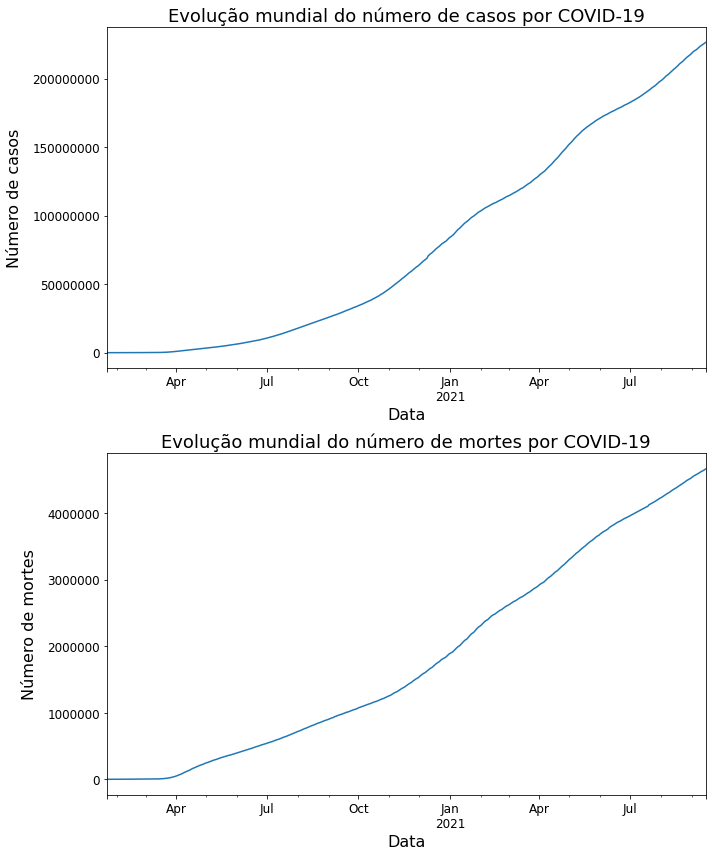

In [ ]:
fig, ax = plt.subplots(nrows = 2, figsize = (10,12))

df_world.total_cases.plot(kind = 'line', ax = ax[0], fontsize = 12)
ax[0].ticklabel_format(style='plain', axis='y') #retira a notação científica do eixo y
ax[0].set_title('Evolução mundial do número de casos por COVID-19', fontsize = 18)
ax[0].set_xlabel('Data', fontsize = 16)
ax[0].set_ylabel('Número de casos', fontsize = 16, labelpad=10)

df_world.total_deaths.plot(kind = 'line', ax = ax[1], fontsize = 12)
ax[1].ticklabel_format(style='plain', axis='y') #retira a notação científica do eixo y
ax[1].set_title('Evolução mundial do número de mortes por COVID-19', fontsize = 18)
ax[1].set_xlabel('Data', fontsize = 16)
ax[1].set_ylabel('Número de mortes', fontsize = 16, labelpad=10)

plt.tight_layout()

Com estas curvas podemos ver como os números de casos e mortes por COVID-19 totais no mundo cresceram. Porém não se pode enxergar outros dados importantes como os períodos mais críticos da pandemia, para este tipo de análise existem variáveis melhores a serem avaliadas. 

##### Curva de casos e mortes diárias (Média móvel)

A seguir vamos apresentar a curva de mortes por COVID-19 em taxa utilizando a variável `new_deaths_smoothed`, que representa os valores de média móvel de mortes diárias calculados para 7 dias. Com esta curva é possível observar e identificar os meses mais críticos e em qual estágio se encontra a pandemia.

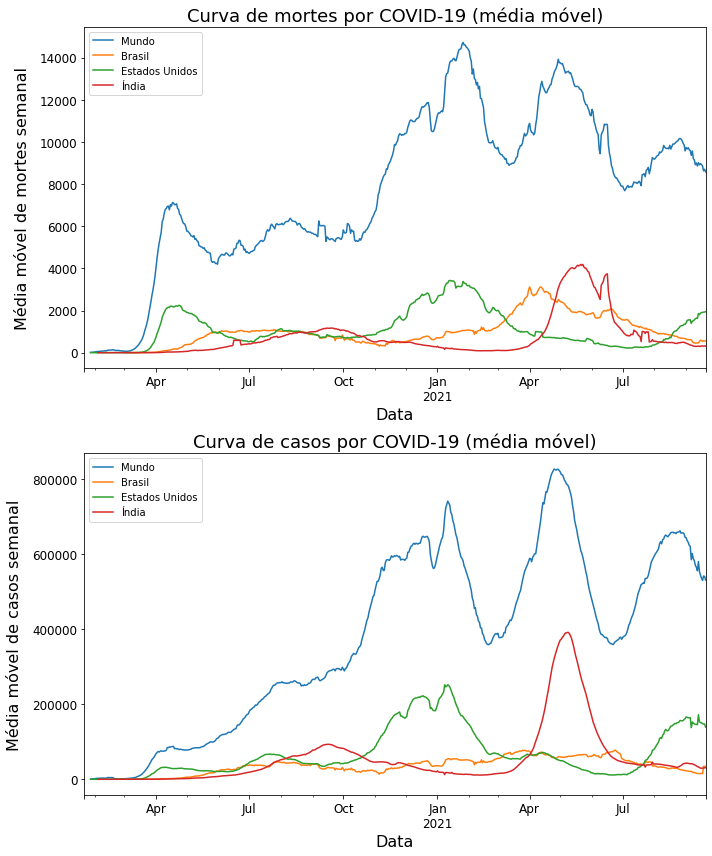

In [ ]:
fig, ax = plt.subplots(nrows = 2, figsize = (10,12))

df_world.new_deaths_smoothed.plot(kind = 'line', ax = ax[0], fontsize = 12)
df_countries.loc[df_countries.location == 'Brazil', ['new_deaths_smoothed','date']].set_index('date').dropna(axis=0).new_deaths_smoothed.plot(kind = 'line', ax = ax[0], fontsize = 12)
df_countries.loc[df_countries.location == 'United States', ['new_deaths_smoothed','date']].set_index('date').dropna(axis=0).new_deaths_smoothed.plot(kind = 'line', ax = ax[0], fontsize = 12)
df_countries.loc[df_countries.location == 'India', ['new_deaths_smoothed','date']].set_index('date').dropna(axis=0).new_deaths_smoothed.plot(kind = 'line', ax = ax[0], fontsize = 12)
ax[0].set_title('Curva de mortes por COVID-19 (média móvel)', fontsize = 18)
ax[0].set_xlabel('Data', fontsize = 16)
ax[0].set_ylabel('Média móvel de mortes semanal', fontsize = 16, labelpad=10)

ax[0].legend(['Mundo','Brasil','Estados Unidos','Índia'], loc = 2)  #loc define a posição da legenda  2 = upper left

df_world.new_cases_smoothed.plot(kind = 'line', ax = ax[1], fontsize = 12)
df_countries.loc[df_countries.location == 'Brazil', ['new_cases_smoothed','date']].set_index('date').dropna(axis=0).new_cases_smoothed.plot(kind = 'line', ax = ax[1], fontsize = 12)
df_countries.loc[df_countries.location == 'United States', ['new_cases_smoothed','date']].set_index('date').dropna(axis=0).new_cases_smoothed.plot(kind = 'line', ax = ax[1], fontsize = 12)
df_countries.loc[df_countries.location == 'India', ['new_cases_smoothed','date']].set_index('date').dropna(axis=0).new_cases_smoothed.plot(kind = 'line', ax = ax[1], fontsize = 12)
ax[1].set_title('Curva de casos por COVID-19 (média móvel)', fontsize = 18)
ax[1].set_xlabel('Data', fontsize = 16)
ax[1].set_ylabel('Média móvel de casos semanal', fontsize = 16, labelpad=10)

plt.legend(['Mundo','Brasil','Estados Unidos','Índia'], loc = 2)  #loc define a posição da legenda  2 = upper left

plt.tight_layout()

Como Estados Unidos, índia e Brasil são os 3 primeiros lugares nos rankings de casos e mortes, pode-se observar como os mesmos influenciaram na curva mundial, pois observa-se que onde existe um topo (período de grande índice de casos ou mortes) na curva mundial também existe um topo na curva de pelo menos um dos 3 países.

##### Relação PIB per capita e número de mortes

A seguir farei um gráfico de dispersão considerando `gdp_per_capita` (ou seja, o PIB dos países) pelo número total de mortos para ver se pode-se encontrar alguma relação. Lembrando que mesmo o gráfico apresentando uma relação entre as variáveis ainda não se pode dizer que uma é consequência ou causa da outra, afinal se tratando de um assunto como as mortes por COVID-19 há infinitos fatores envolvidos como proporção de testes, vacinas, idade média populacional, medidas de isolamento adotadas pelos governos, etc.

Vamos primeiro separar os dados que serão utilizados para este gráfico:

In [ ]:
data_scatter = df_countries.loc[df_countries.date == '2021-09-07', ['gdp_per_capita', 'total_deaths_per_million']].dropna(axis = 0)
data_scatter.shape

(179, 2)

Ao verificar os dados dos países de `gdp_per_capita` e `total_deaths_per_million` para a data mais recente foi possível enxergar certa quantidade de valores ausentes, pois para alguns países não se encontrava o valor do PIB per capita. Neste caso foram retiradas as entradas com valores ausentes e ainda restaram 179 pontos a serem apresentados no gráfico de dispersão.

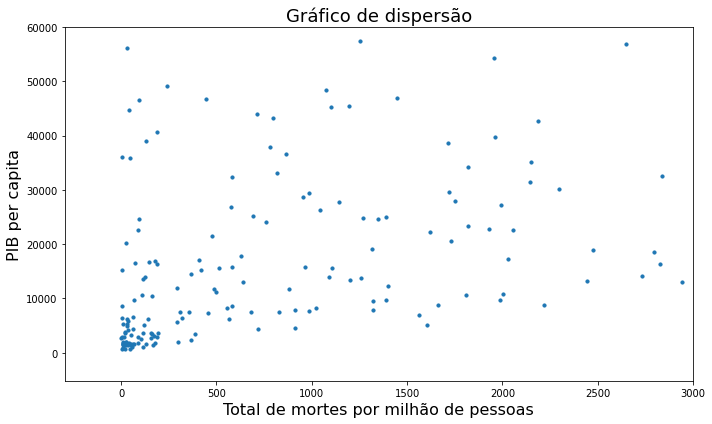

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

data_scatter.plot.scatter(x = 'total_deaths_per_million', y = 'gdp_per_capita', ax = ax, s = 10)
ax.set_title('Gráfico de dispersão', fontsize = 18)
ax.set_xlabel('Total de mortes por milhão de pessoas', fontsize = 16)
ax.set_ylabel('PIB per capita', fontsize = 16)

plt.xlim(right = 3000)
plt.ylim(top = 60000)

plt.tight_layout()

Na primeira tentativa para gerar o gráfico de dispersão não foram incluídos limites para os eixos x e y, porém o gráfico gerado não tinha grande valor visualmente pois haviam poucas entradas muito dispersas das outras que alcançavam números muito altos em PIB ou total de mortes, o que resultou em uma péssima visualização do intervalo onde havia maior concentração de pontos. Logo, para facilitar a visualização, o gráfico foi ajustado com limites nos dois eixos para obter um foco maior onde se localizavam a grande maioria dos pontos. O resultado pode ser visto acima.

Com base no gráfico de dispersão gerado não se pode dizer que há alguma relação entre o PIB per capita e o total de mortes por milhão de pessoas, pois não foi possível identificar nenhum tipo de padrão de linearidade ou qualquer outro.

##### Relação entre número de mortes e idade populacional

Desde o início da pandemia se fala bastante sobre a faixa etária de maior risco de morte pelo vírus. Sabe-se que pessoas de idade avançada tem maiores chances de desenvolver complicações pela doença assim como pessoas com comorbidades.

Neste *dataset* existem algumas variáveis relacionadas à idade populacional. São elas:
* `median_age` -	Idade média da população, projeção da ONU para 2020
* `aged_65_older` -	Parcela da população com 65 anos ou mais, ano mais recente disponível
* `aged_70_older` -	Parcela da população com 70 anos ou mais em 2015

Seria possível observar alguma relação entre o número de mortes por milhão de pessoas e as variáveis citadas acima? 

Vamos checar esta teoria utilizando novamente o auxílio de graficos de dispersão para a data mais atual, onde cada ponto é representado por um país:

In [ ]:
df_age = df_countries.loc[df_countries.date == '2021-09-07', ['total_deaths_per_million', 'median_age', 'aged_65_older', 'aged_70_older', 'total_cases_per_million']].dropna(axis = 0)

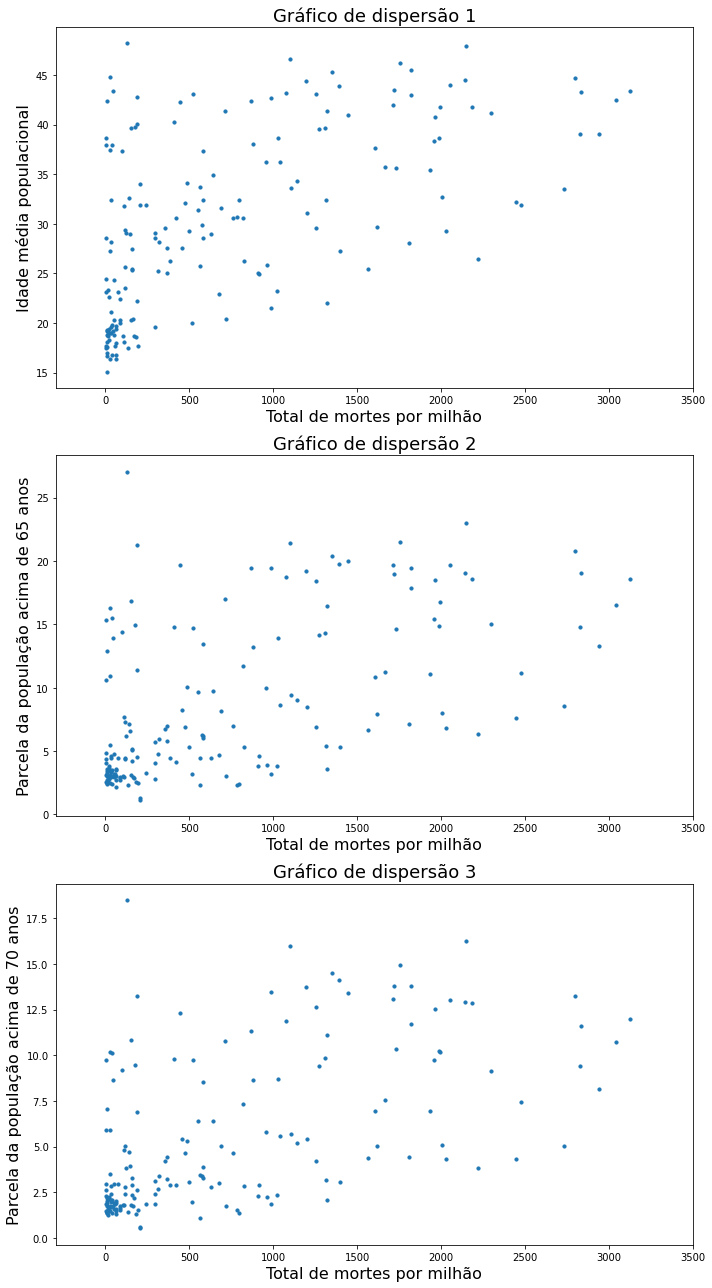

In [ ]:
fig, ax = plt.subplots(nrows = 3, figsize = (10,18))

df_age.plot.scatter(x = 'total_deaths_per_million', y = 'median_age', ax = ax[0], s = 10)
ax[0].set_title('Gráfico de dispersão 1', fontsize = 18)
ax[0].set_xlabel('Total de mortes por milhão', fontsize = 16)
ax[0].set_ylabel('Idade média populacional', fontsize = 16)
ax[0].set_xlim(right = 3500)

df_age.plot.scatter(x = 'total_deaths_per_million', y = 'aged_65_older', ax = ax[1], s = 10)
ax[1].set_title('Gráfico de dispersão 2', fontsize = 18)
ax[1].set_xlabel('Total de mortes por milhão', fontsize = 16)
ax[1].set_ylabel('Parcela da população acima de 65 anos', fontsize = 16)
ax[1].set_xlim(right = 3500)

df_age.plot.scatter(x = 'total_deaths_per_million', y = 'aged_70_older', ax = ax[2], s = 10)
ax[2].set_title('Gráfico de dispersão 3', fontsize = 18)
ax[2].set_xlabel('Total de mortes por milhão', fontsize = 16)
ax[2].set_ylabel('Parcela da população acima de 70 anos', fontsize = 16)
ax[2].set_xlim(right = 3500)

plt.tight_layout()

Apenas observando o gráfico 1 (idade média populacional X total de mortes por milhão) é possível observar traços de linearidade. Como exemplo se nos atentarmos à variável `total_deaths_per_million`, a mesma só alcança valores acima de 2000 para países que possuem idade média populacional acima dos 25 anos. Ao mesmo tempo, a variável apenas alcança valores acima de 3000 mortes por milhão quando a idade média populacional é próxima dos 40 anos.

Observa-se também que há muitos países de alta idade média populacional porém com uma taxa de mortes muito baixa, estes por sua vez foram países que conseguiram controlar bem os índices de transmissão da doença.

Os gráficos 2 e 3, onde foram utilizados os dados da parcela da população acima de 65 e 70 anos, também apresentaram alguns sinais de linearidade como o gráfico 1.

Apenas para fins de visualização vamos aplicar uma regressão linear em um dos gráficos por meio da biblioteca *Seaborn*. A regressão linear encontra a linha reta que se adequa melhor à disposição de pontos apresentada, assim poderemos enxergar melhor a relação existente entre as variáveis:



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


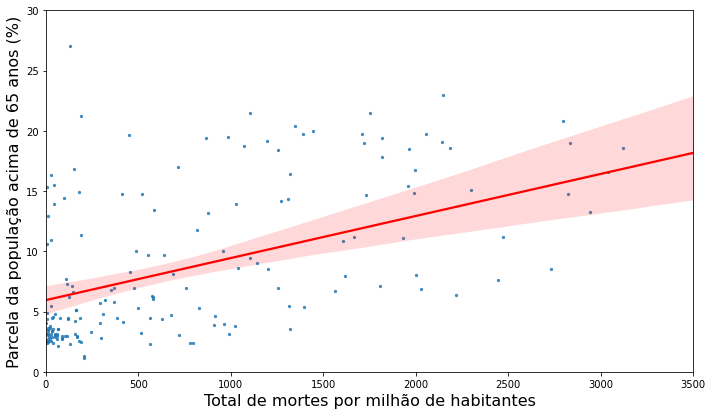

In [ ]:
# plotar scatter plot e regressão linear
fig, ax = plt.subplots(figsize = (10,6))
ax.set_xlim(right=3500)
ax.set_ylim(top = 30)
sns.regplot('total_deaths_per_million', 'aged_65_older', scatter_kws={"s": 5},
            line_kws={"color": "red"}, data=df_age, ax=ax, )
# ax.set_title('Regressão linear em gráfico de dispersão', fontsize = 18)
ax.set_xlabel('Total de mortes por milhão de habitantes', fontsize = 16)
ax.set_ylabel('Parcela da população acima de 65 anos (%)', fontsize = 16)


plt.tight_layout()

Pela regressão linear no gráfico de dispersão acima pode-se concluir que realmente existe relação entre as duas variáveis, mas como já foi dito antes, existem inúmeras outras variáveis que interferem no índice de mortes por COVID-19 em cada país, afinal cada país foi atingido pelo vírus de forma diferente.

#### Análise de Vacinas

Terminada a análise dos dados de casos e mortes, vamos agora avaliar o panorama mundial de vacinação contra o vírus. 

##### 10 países com maiores números de vacinação


Para iniciar esta análise vamos primeiro apresentar um ranking com os 10 países com maior número de pessoas vacinadas. As variáveis que irei utilizar serão `people_vaccinated` e `people_fully_vaccinated`, que representam respectivamente o número total de pessoas que receberam pelo menos uma dose de qualquer vacina e total de pessoas que receberam o protocolo de vacinação completo, ou seja, duas doses.

In [ ]:
df_countries[['location', 'people_vaccinated', 'people_fully_vaccinated', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']].loc[df.date == '2021-09-07'].dropna(
    axis = 0).sort_values(by = 'people_fully_vaccinated', ascending = False).reset_index(drop = True)[:10]

,location,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
0,United States,207589611.0,176659496.0,61.72,52.53
1,India,536004002.0,163664402.0,38.47,11.75
2,Japan,77098247.0,61995078.0,61.16,49.18
3,Germany,54998998.0,51236028.0,65.55,61.07
4,United Kingdom,48319435.0,43620946.0,70.84,63.95
5,France,49199360.0,41837608.0,72.82,61.92
6,Indonesia,68208588.0,39165980.0,24.68,14.17
7,Turkey,50324643.0,38978541.0,59.18,45.83
8,Russia,44857289.0,38776624.0,30.74,26.58
9,Italy,43406197.0,37832407.0,71.90,62.67


Os países foram ordenados por `people_fully_vaccinated`, pessoas que receberam o protocolo completo de vacinação. É notável que se fosse ordenado por `people_vaccinated` o ranking mudaria muito pouco.

Como já foi feito nas análises de casos e mortes, podemos desconsiderar o tamanho da população de cada país utilizando as variáveis `people_vaccinated_per_hundred` e `people_fully_vaccinated_per_hundred`, que são os números de pessoas vacinadas por centena. Desta forma podemos comparar de forma mais justa a efetividade dos processos de vacinação de cada país.

Agora vamos refazer o ranking ordenando pela variável `people_fully_vaccinated_per_hundred`:

In [ ]:
df_countries[['location', 'people_vaccinated', 'people_fully_vaccinated', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']].drop(
    df_countries.loc[df_countries.location == 'Gibraltar'].index, axis = 0).loc[df.date == '2021-09-07'].dropna(axis = 0).sort_values(by = 'people_fully_vaccinated_per_hundred',
                                                                                                                                    ascending = False).reset_index(drop = True)[:10]

#retirei da lista a localidade Gibraltar, pois apresentou dados incoerentes

,location,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
0,Pitcairn,47.0,47.0,100.00,100.00
1,Malta,415931.0,414798.0,80.83,80.61
2,Portugal,8778866.0,7985535.0,86.34,78.54
3,United Arab Emirates,8812200.0,7704493.0,88.20,77.11
4,Iceland,280122.0,264629.0,81.58,77.07
5,Spain,37008271.0,34739745.0,79.17,74.32
6,Denmark,4423837.0,4268854.0,76.10,73.43
7,Uruguay,2692480.0,2532573.0,77.26,72.67
8,Chile,14469352.0,13867079.0,75.31,72.18
9,Faeroe Islands,37008.0,34924.0,75.44,71.20


Pode-se ver pela lista acima que algumas localidades com populações muito pequenas obtiveram grande percentual de pessoas vacinadas com facilidade. Já era esperado que países com altos índices populacionais teriam problemas para completar os protocolos de vacina, ao contrário de países pouco populosos.


##### Rankings e curvas de vacinação (Mundo e continentes)

Vamos analisar o andamento da distribuição de vacinas nos diferentes continentes e também em âmbito mundial.

Primeiro será criado um *DataFrame* separado para somente para os continentes:

In [ ]:
df_continents = df.copy()
df_continents.drop(df_continents.loc[df_continents.location =='World']. index, axis=0, inplace = True)
df_continents.drop(df_countries. index, axis=0, inplace = True)
df_continents.drop(df_continents.loc[df_continents.location =='European Union']. index, axis=0, inplace = True)
# df_continents.set_index('date', inplace = True)
df_continents.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality
578,OWID_AFR,NaN,Africa,2020-02-13,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.373486e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579,OWID_AFR,NaN,Africa,2020-02-14,1.0,1.0,NaN,NaN,0.0,NaN,0.001,0.001,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.373486e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
580,OWID_AFR,NaN,Africa,2020-02-15,1.0,0.0,NaN,NaN,0.0,NaN,0.001,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.373486e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581,OWID_AFR,NaN,Africa,2020-02-16,1.0,0.0,NaN,NaN,0.0,NaN,0.001,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.373486e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
582,OWID_AFR,NaN,Africa,2020-02-17,1.0,0.0,NaN,NaN,0.0,NaN,0.001,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.373486e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A seguir, assim como foi feito para os países, vamos analisar o panorama de vacinação atual dos continentes, ordenando-os em número de pessoas vacinadas e percentual de pessoas vacinadas.

In [ ]:
df_continents.loc[df.date =='2021-09-07', ['location','people_vaccinated']].sort_values('people_vaccinated',ascending = False).reset_index(drop = True)

,location,people_vaccinated
0,Asia,2.170797e+09
1,Europe,4.090688e+08
2,North America,3.258028e+08
3,South America,2.443919e+08
4,Africa,7.508358e+07
5,Oceania,1.703309e+07


In [ ]:
df_continents.loc[df.date =='2021-09-07', ['location','people_vaccinated_per_hundred']].sort_values('people_vaccinated_per_hundred',ascending = False).reset_index(drop = True)

,location,people_vaccinated_per_hundred
0,South America,56.28
1,Europe,54.71
2,North America,54.61
3,Asia,46.39
4,Oceania,39.41
5,Africa,5.47


Além dos números atuais, também é importante visualizar como cada continente chegou à situação atual de vacinação. Vamos então plotar gráficos representando a evolução do processo de vacinação contra COVID-19 do início da pandemia até os dias de hoje.

Nesta análise é possível observar quais continentes se anteciparam em relação aos outros nos processos de vacinação.

Serão plotados dois gráficos de linhas: O primeiro utiliza valores de média móvel de vacinas aplicadas e o segundo a média móvel de vacinas aplicadas por milhão de pessoas.



In [ ]:
df_continents.set_index('date', inplace = True)  #iniciamos utilizando a coluna "date" como índice

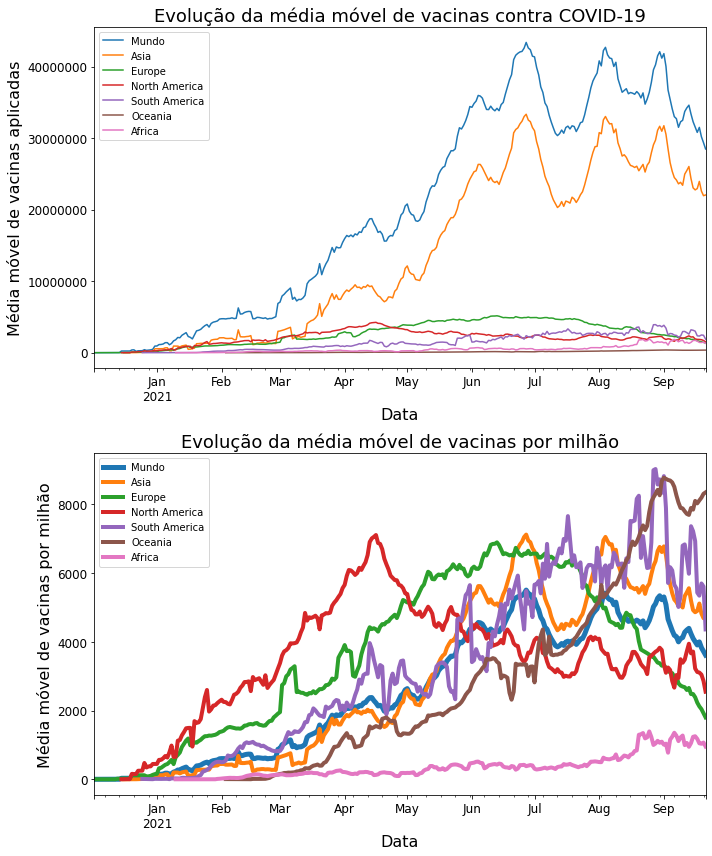

In [ ]:
fig, ax = plt.subplots(nrows = 2, figsize = (10,12))

df_world.new_vaccinations_smoothed.dropna(axis = 0).plot(kind = 'line', ax = ax[0], fontsize = 12)
df_continents.loc[df_continents.location == 'Asia'].new_vaccinations_smoothed.dropna(axis = 0).plot(kind = 'line', ax = ax[0])
df_continents.loc[df_continents.location == 'Europe'].new_vaccinations_smoothed.dropna(axis = 0).plot(kind = 'line', ax = ax[0])
df_continents.loc[df_continents.location == 'North America'].new_vaccinations_smoothed.dropna(axis = 0).plot(kind = 'line', ax = ax[0])
df_continents.loc[df_continents.location == 'South America'].new_vaccinations_smoothed.dropna(axis = 0).plot(kind = 'line', ax = ax[0])
df_continents.loc[df_continents.location == 'Oceania'].new_vaccinations_smoothed.dropna(axis = 0).plot(kind = 'line', ax = ax[0])
df_continents.loc[df_continents.location == 'Africa'].new_vaccinations_smoothed.dropna(axis = 0).plot(kind = 'line', ax = ax[0])
ax[0].set_title('Evolução da média móvel de vacinas contra COVID-19', fontsize = 18)
ax[0].set_xlabel('Data', fontsize = 16)
ax[0].set_ylabel('Média móvel de vacinas aplicadas', fontsize = 16)

ax[0].ticklabel_format(style='plain', axis='y') #retira a notação científica do eixo y
ax[0].legend(['Mundo','Asia','Europe','North America', 'South America', 'Oceania', 'Africa'], loc = 2)  #loc define a posição da legenda  2 = upper left

df_world.new_vaccinations_smoothed_per_million.dropna(axis = 0).plot(kind = 'line', ax = ax[1], fontsize = 12, linewidth = 5)
df_continents.loc[df_continents.location == 'Asia'].new_vaccinations_smoothed_per_million.dropna(axis = 0).plot(kind = 'line', ax = ax[1], linewidth = 4)
df_continents.loc[df_continents.location == 'Europe'].new_vaccinations_smoothed_per_million.dropna(axis = 0).plot(kind = 'line', ax = ax[1], linewidth = 4)
df_continents.loc[df_continents.location == 'North America'].new_vaccinations_smoothed_per_million.dropna(axis = 0).plot(kind = 'line', ax = ax[1], linewidth = 4)
df_continents.loc[df_continents.location == 'South America'].new_vaccinations_smoothed_per_million.dropna(axis = 0).plot(kind = 'line', ax = ax[1], linewidth = 4)
df_continents.loc[df_continents.location == 'Oceania'].new_vaccinations_smoothed_per_million.dropna(axis = 0).plot(kind = 'line', ax = ax[1], linewidth = 4)
df_continents.loc[df_continents.location == 'Africa'].new_vaccinations_smoothed_per_million.dropna(axis = 0).plot(kind = 'line', ax = ax[1], linewidth = 4)
ax[1].set_title('Evolução da média móvel de vacinas por milhão', fontsize = 18)
ax[1].set_xlabel('Data', fontsize = 16)
ax[1].set_ylabel('Média móvel de vacinas por milhão', fontsize = 16)

ax[1].legend(['Mundo','Asia','Europe','North America', 'South America', 'Oceania', 'Africa'], loc = 2)  #loc define a posição da legenda  2 = upper left

plt.tight_layout()

Observa-se pelo primeiro gráfico de média móvel de vacinas que a grande maioria das vacinas aplicadas mundialmente são referentes ao continente asiático. Apenas pelo gráfico é possível constatar que as vacinas distribuídas na Ásia são próximos de 70% das distribuídas mundialmente. Isso se deve ao fato de que a Ásia é continente mais habitado do mundo, com uma população de aproximadamente 60% da população mundial, já era de se esperar que seria o recordista em número de vacinas aplicadas.

Já no segundo gráfico, utilizando os valores de média móvel de vacinas por milhão de pessoas, é como se em cada continente houvesse uma quantidade igual de habitantes (1 milhão), e desta forma podemos comparar melhor a evolução dos processos de imunização em cada continente.

Neste gráfico alguns pontos se destacam:

* É notável como a América do Norte se antecipou em relação aos outros continentes no início de aplicação de vacinas (provavelmente refletiu principalmente o comportamento dos Estados Unidos).
* Na América do Sul, Oceania e Asia os valores de vacinas aplicadas por milhão de pessoas tiveram um aumento mais lento se comparado à América do Norte e Europa. Isso reflete bem quais regiões do mundo tiveram mais dificuldade de acesso às vacinas.
* Algumas curvas oscilam muito mais que as outras. Se compararmos por exemplo as curvas referentes à América do Norte e América do Sul pode-se observar que uma oscila muito mais que a outra em determinados intervalos de tempo. Essas diferenças de oscilação podem estar relacionadas à países que não conseguiram manter um rítmo constante de vacinação por motivos diversos como a falta de vacinas.
* E por último se constata a escassês de vacinas no continente africano, que até hoje não alcançou uma taxa maior que 2 mil vacinas por milhão de pessoas. Na Africa como se sabe, constituída de países assolados grandemente pela miséria, a aplicação de vacinas é muito mais difícil se comparada aos demais continentes.

##### Relação PIB per capita e vacinas aplicadas

Muito se discute sobre as vacinas terem chegado primeiro aos países ricos e somente depois aos outros demais. Até quanto isso é verdade? Vamos verificar...

Tentaremos enxergar alguma relação entre o PIB per capita dos países com seus respectivos números de pessoas vacinadas. Para isso vamos usar novamente o auxílio de gráficos de dispersão:

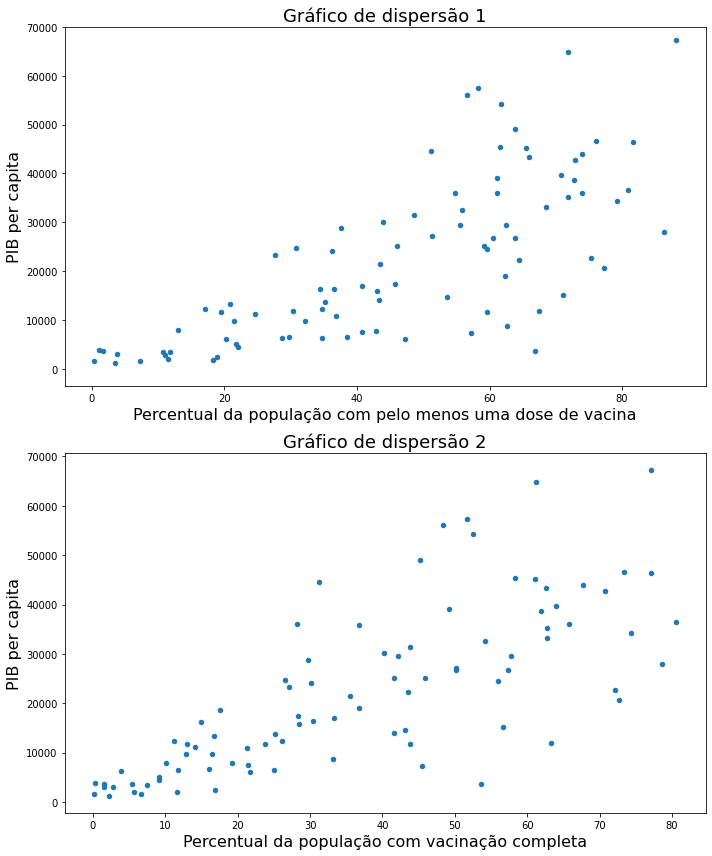

In [ ]:
fig, ax = plt.subplots(nrows = 2, figsize = (10,12))

# df_age.plot.scatter(x = 'total_deaths_per_million', y = 'aged_70_older', ax = ax[2], s = 10)

df_countries.loc[df_countries.date == '2021-09-07'].plot.scatter(x = 'people_vaccinated_per_hundred', y = 'gdp_per_capita', ax = ax[0])
ax[0].set_ylim(top = 70000)
ax[0].set_title('Gráfico de dispersão 1', fontsize = 18)
ax[0].set_ylabel('PIB per capita', fontsize = 16)
ax[0].set_xlabel('Percentual da população com pelo menos uma dose de vacina', fontsize = 16)

df_countries.loc[df_countries.date == '2021-09-07'].plot.scatter(x = 'people_fully_vaccinated_per_hundred', y = 'gdp_per_capita', ax = ax[1])
ax[1].set_title('Gráfico de dispersão 2', fontsize = 18)
ax[1].set_ylabel('PIB per capita', fontsize = 16)
ax[1].set_xlabel('Percentual da população com vacinação completa', fontsize = 16)

plt.tight_layout()

Quando relacionei os valores de PIB per capita com as mortes por COVID-19 não consegui observar nenhuma relação no gráfico de dispersão. Já agora relacionando PIB per capita com o número de pessoas vacinadas sem sombra de dúvida existe uma relação de linearidade. Observa-se que quanto maior o PIB per capita maior é o percentual de pessoas vacinadas em ambos os gráficos de dispersão, seja para pessoas que receberam apenas uma dose ou com protocolo completo de vacinação.

Também apenas para simples visualização, assim como foi feito anteriormente em outra análise vamos aplicar a regressão linear para um dos gráficos:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


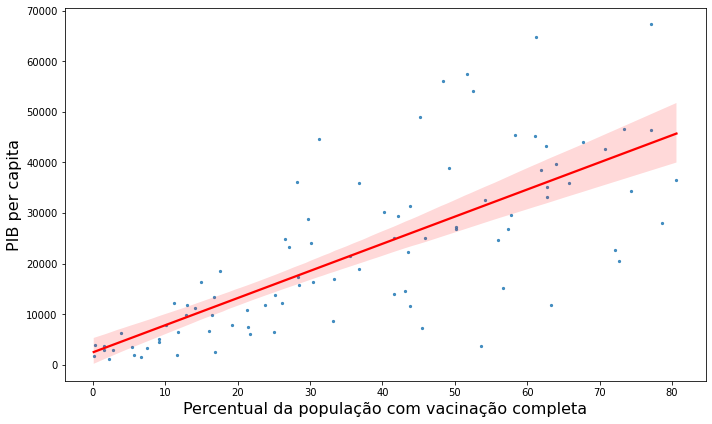

In [ ]:
# sns.regplot('total_deaths_per_million', 'aged_65_older', scatter_kws={"s": 5},
#             line_kws={"color": "red"}, data=df_age, ax=ax, )
fig, ax = plt.subplots(figsize = (10,6))

sns.regplot('people_fully_vaccinated_per_hundred', 'gdp_per_capita', scatter_kws={'s':5},
            line_kws = {'color':'red'}, data = df_countries.loc[df_countries.date == '2021-09-07'], ax = ax)
ax.set_ylabel('PIB per capita', fontsize = 16)
ax.set_xlabel('Percentual da população com vacinação completa', fontsize = 16)

plt.tight_layout()

Como já foi dito anteriormente, a regressão linear foi feita apenas com o intuito de facilitar a observação da existência de relação entre as duas variáveis, pois a linearidade entre elas não é perfeita, existe apenas uma relação. Afinal muitas outras variáveis envolvem a aplicação de vacinas em cada país.

#### Matriz de Correlação entre as variáveis

Ainda existem inúmeras relações entre variáveis que poderiam ser testadas. Para isso iremos criar uma matriz de correlação entre as variáveis numéricas. Tentarei escolher as variáveis mais relevantes para esta análise e usarei somente os dados da data mais recente.

In [ ]:
corr = df_countries.loc[df_countries.date == '2021-09-07'][['total_deaths_per_million', 'total_cases_per_million', 'total_tests_per_thousand', 
                                                              'people_vaccinated_per_hundred', 'population_density', 'median_age', 'gdp_per_capita', 
                                                              'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 
                                                              'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 
                                                              'human_development_index']].corr()

display(corr)

,total_deaths_per_million,total_cases_per_million,total_tests_per_thousand,people_vaccinated_per_hundred,population_density,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_deaths_per_million,1.000000,0.686448,0.050242,0.171340,-0.048386,0.507728,0.198831,-0.457500,-0.192994,0.002881,0.526625,0.108831,0.509328,0.258407,0.446033,0.488390
total_cases_per_million,0.686448,1.000000,0.425036,0.447128,0.043416,0.599767,0.454573,-0.535547,-0.290714,0.028763,0.540882,0.147708,0.590766,0.315088,0.578768,0.629201
total_tests_per_thousand,0.050242,0.425036,1.000000,0.418697,0.017621,0.340893,0.414291,-0.297738,-0.148901,0.107162,0.316599,0.152975,0.437202,0.131749,0.361095,0.419698
people_vaccinated_per_hundred,0.171340,0.447128,0.418697,1.000000,0.187511,0.581950,0.697753,-0.570963,-0.568536,-0.021121,0.261359,-0.307346,0.659995,0.207766,0.715604,0.756617
population_density,-0.048386,0.043416,0.017621,0.187511,1.000000,0.148665,0.409488,-0.033639,-0.175321,0.007933,-0.062219,-0.000455,0.102984,0.314143,0.234199,0.179622
median_age,0.507728,0.599767,0.340893,0.581950,0.148665,1.000000,0.643460,-0.697290,-0.341405,0.136768,0.635594,0.174119,0.785879,0.662467,0.845473,0.897845
gdp_per_capita,0.198831,0.454573,0.414291,0.697753,0.409488,0.643460,1.000000,-0.502403,-0.477840,0.129383,0.327347,-0.101353,0.647415,0.298893,0.683813,0.753171
extreme_poverty,-0.457500,-0.535547,-0.297738,-0.570963,-0.033639,-0.697290,-0.502403,1.000000,0.189471,-0.378415,-0.411692,-0.192223,-0.751043,-0.443556,-0.747547,-0.777256
cardiovasc_death_rate,-0.192994,-0.290714,-0.148901,-0.568536,-0.175321,-0.341405,-0.477840,0.189471,1.000000,0.147941,-0.142891,0.426005,-0.039956,0.011199,-0.467461,-0.427486
diabetes_prevalence,0.002881,0.028763,0.107162,-0.021121,0.007933,0.136768,0.129383,-0.378415,0.147941,1.000000,0.009395,0.203626,0.473175,-0.072972,0.220464,0.199409


De modo a tornar a matriz mais apresentável e facilitar a visualização de altas correlações vamos utilizar a biblioteca *Seaborn* para plotar um *heatmap* da matriz cujas correlações irão variar de acordo com a escala de cores.

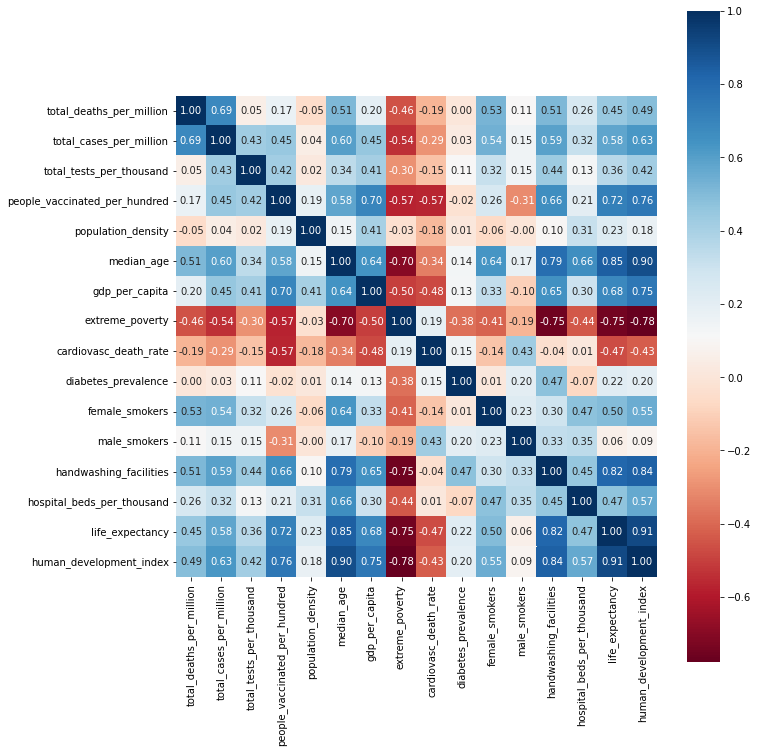

In [ ]:
# plotar um heatmap a partir das correlações
# sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

fig, ax = plt.subplots(figsize = (11,11))

sns.heatmap(corr, cmap = 'RdBu', fmt = '.2f', square = True, linecolor = 'white', annot = True)

plt.tight_layout()

Para aqueles menos familiarizados com uma matriz de correlação, basicamente quanto mais próximo de 1, maior é a correlação entre as variáveis. A correlação pode ser positiva ou negativa, sendo a parte positiva descrita em escala de cores azul e as negativas em escala de cores vermelha.

Muito pode ser dito sobre as correlações apresentadas, mas vou comentar apenas algumas que me chamam mais atenção ou sejam mais relevantes para o projeto. Mas sinta-se livre para observar atentamente os valores de correlação e tirar suas próprias conclusões sobre as demais variáveis.

Algumas correlações interessantes:
* `total_deaths_per_million`e `total_cases_per_million` apresentam uma correlação de 0,69, número já esperado pois um alto índice de casos po COVID-19 tem grandes chances de gerar um alto índice de mortes. 

* `human_development_index` possui alta correlação com as variáveis `life_expectancy`, `gdp_per_capita`, `median_age` e `people_vaccinated_per_hundrted`. Tais correlações reforçam a ideia de que quanto mais desenvolvido for o país, maior será a expectativa de vida, PIB per capita e idade média dos habitantes. Estes países obtiveram bons índices de vacinação na pandemia.

* Em contrapartida temos também altos valores de correlação negativa para a variável `extreme_poverty`. É de se esperar que países com alto nível de pobreza extrema possuam baixos valores de IDH (índice de desenvolvimento humano), expectativa de vida, idade média populacional e PIB per capita, bem como baixo desempenho nos índices de vacinação. 

### Análise Exploratória para o Brasil

Agora vamos iniciar uma análise aprofundada com o foco apenas no Brasil.

Antes deve-se criar um *DataFrame* separado com os dados referentes apenas ao Brasil:

In [ ]:
df_brazil = df_countries.loc[df_countries.location == 'Brazil'].copy()
df_brazil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality
15250,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN
15251,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN
15252,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN
15253,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,7049.6,3.31,5.25
15254,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN


Ao observar as 5 primeiras entradas do novo *DataFrame* identifica-se que o mesmo continua com os índices do *DF* anterior. 

A seguir resetarei o índice do *DataFrame* e então vamos verificar quando foi registrada a primeira morte por COVID-19 no Brazil:

In [ ]:
#resetando o indice do novo dataframe para iniciar do 0
df_brazil.reset_index(drop = True, inplace=True) # o indice antigo se torna uma coluna, "drop = True" remove esta coluna
df_brazil.loc[df_brazil.total_deaths == 1, ['date']]  # Data da primeira morte por covid no Brasil

,date
20,2020-03-17


Temos que a primeira morte registrada no Brasil foi no dia 17 de Março de 2020. E como o índice foi resetado pode-se concluir que o número 20 corresponde ao número de dias que se passaram desde a primeira data, se a atualização dos dados é feita diariamente. Mas para confirmar vamos calcular o intervalo de tempo entre o primeiro caso de COVID-19 no Brasil até a primeira morte subtraindo as duas datas:

In [ ]:
print('Data do primeiro caso de COVID-19 no Brasil: ', df_brazil.date[0])

first_death = df_brazil.loc[df_brazil.total_deaths == 1, ['date']].reset_index(drop = True) #é preciso resetar o índice para que seja acessada a data a partir do índice 0.
# O indice anterior se torna uma coluna, "drop = True" remove essa coluna
print('Data da primeira morte por COVID-19 no Brasil: ',first_death.date[0])

# Agora basta subtrair uma data da outra
print('Intervalo de tempo entre o primeiro caso e a primeira morte: ', (first_death.date[0]-df_brazil.date[0]))

Data do primeiro caso de COVID-19 no Brasil:  2020-02-26 00:00:00
Data da primeira morte por COVID-19 no Brasil:  2020-03-17 00:00:00
Intervalo de tempo entre o primeiro caso e a primeira morte:  20 days 00:00:00


Como resultado obtivemos um intervalo de 20 dias entre a data do primeiro caso até a primeira morte por COVID-19 no país. Pode-se observar que o valor é equivalente ao índice referente à data da primeira morte, já que a atualização de dados é feita todos os dias sem falta.

Algo interessante a se fazer também, agora que não há datas repetidas neste *DataFrame*, é utilizar a variável `date` como índice, assim como já foi feito antes neste projeto.

In [ ]:
df_brazil.set_index('date', inplace = True)
df_brazil.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-26,BRA,South America,Brazil,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN
2020-02-27,BRA,South America,Brazil,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN
2020-02-28,BRA,South America,Brazil,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN
2020-02-29,BRA,South America,Brazil,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,7049.6,3.31,5.25
2020-03-01,BRA,South America,Brazil,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN


A seguir vamos utilizar gráficos de linha para visualizar a evolução da pandemia no país em número de casos e mortes totais.

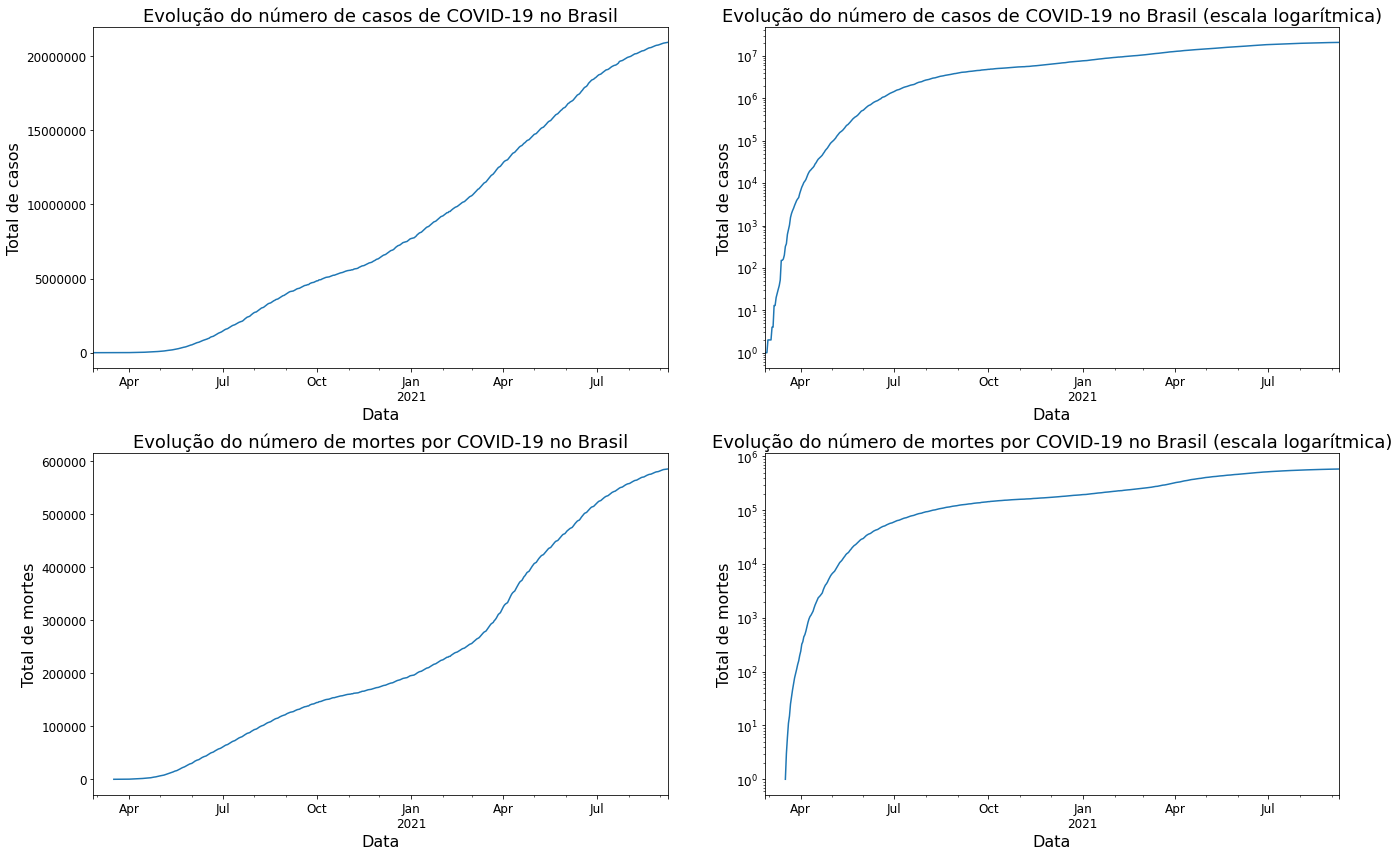

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20,12))

df_brazil.total_cases.plot(kind = 'line', ax = ax[0,0], fontsize = 12)

ax[0,0].set_title('Evolução do número de casos de COVID-19 no Brasil', fontsize = 18)
ax[0,0].set_xlabel('Data', fontsize = 16)
ax[0,0].set_ylabel('Total de casos', fontsize = 16)
ax[0,0].ticklabel_format(style = 'plain', axis = 'y') #retira a notação científica do eixo y

df_brazil.total_cases.plot(kind = 'line', ax = ax[0,1], fontsize = 12)

ax[0,1].set_title('Evolução do número de casos de COVID-19 no Brasil (escala logarítmica)', fontsize = 18)
ax[0,1].set_xlabel('Data', fontsize = 16)
ax[0,1].set_ylabel('Total de casos', fontsize = 16)
ax[0,1].set_yscale('log')

df_brazil.total_deaths.plot(kind = 'line', ax = ax[1,0], fontsize = 12)

ax[1,0].set_title('Evolução do número de mortes por COVID-19 no Brasil', fontsize = 18)
ax[1,0].set_xlabel('Data', fontsize = 16)
ax[1,0].set_ylabel('Total de mortes', fontsize = 16)

df_brazil.total_deaths.plot(kind = 'line', ax = ax[1,1], fontsize = 12)

ax[1,1].set_title('Evolução do número de mortes por COVID-19 no Brasil (escala logarítmica)', fontsize = 18)
ax[1,1].set_xlabel('Data', fontsize = 16)
ax[1,1].set_ylabel('Total de mortes', fontsize = 16)
ax[1,1].set_yscale('log')

plt.tight_layout()

Assim como foi observado anteriormente na análise do panorama mundial, os gráficos com o número total de mortes e casos não dizem muito sobre o estágio em que se encontra a pandemia em determinada data.

A seguir vamos plotar gráficos com os valores diários da média móvel de casos, mortes e pessoas vacinadas.

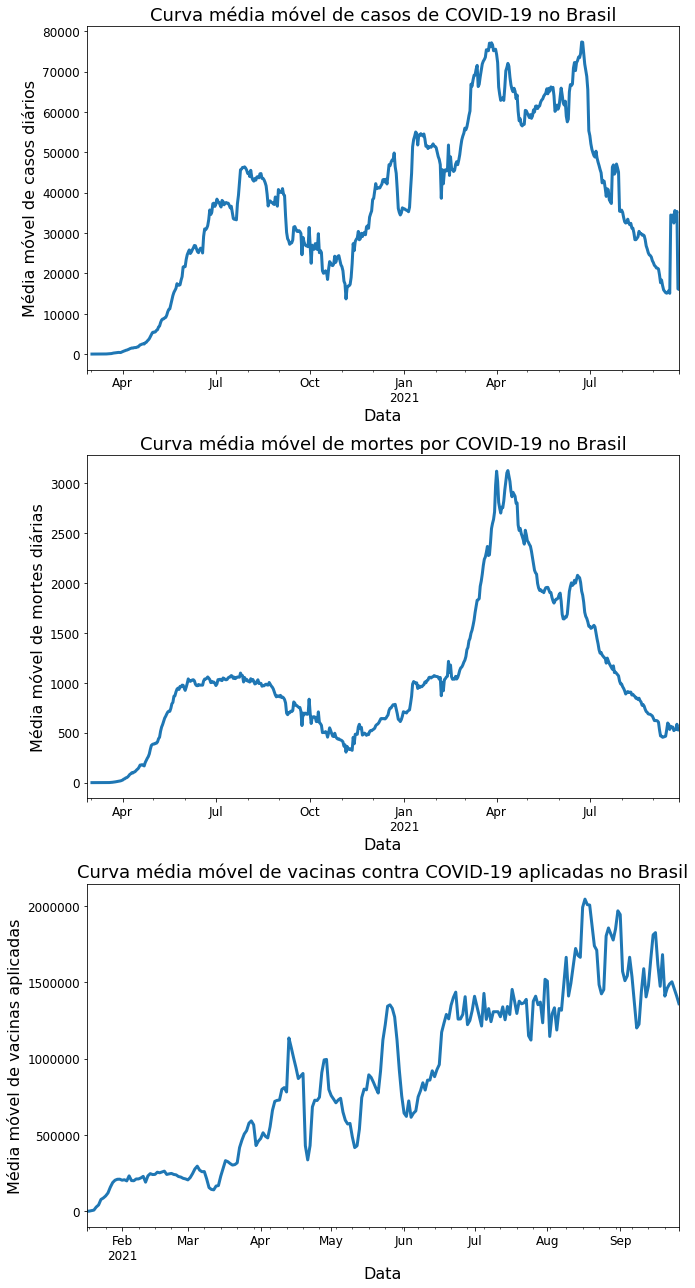

In [ ]:
fig, ax = plt.subplots(nrows = 3, figsize = (10,18))

# df_world.new_vaccinations_smoothed.dropna(axis = 0).plot(kind = 'line', ax = ax[0], fontsize = 12)

df_brazil.new_cases_smoothed.plot(kind = 'line', ax = ax[0], fontsize = 12, linewidth = 3)
ax[0].set_title('Curva média móvel de casos de COVID-19 no Brasil', fontsize = 18)
ax[0].set_xlabel('Data', fontsize = 16)
ax[0].set_ylabel('Média móvel de casos diários', fontsize = 16)

df_brazil.new_deaths_smoothed.plot(kind = 'line', ax = ax[1], fontsize = 12, linewidth = 3)
ax[1].set_title('Curva média móvel de mortes por COVID-19 no Brasil', fontsize = 18)
ax[1].set_xlabel('Data', fontsize = 16)
ax[1].set_ylabel('Média móvel de mortes diárias', fontsize = 16)

df_brazil.new_vaccinations_smoothed.dropna(axis = 0).plot(kind = 'line', ax = ax[2], fontsize = 12, linewidth = 3)
ax[2].ticklabel_format(style='plain', axis='y') #retira a notação científica do eixo y
ax[2].set_title('Curva média móvel de vacinas contra COVID-19 aplicadas no Brasil', fontsize = 18)
ax[2].set_xlabel('Data', fontsize = 16)
ax[2].set_ylabel('Média móvel de vacinas aplicadas', fontsize = 16)

plt.tight_layout()


## Conclusão

A análise possibilitou enxergar os fatores que mais dificultaram a luta contra o vírus COVID-19 nos demais países. Nota-se a partir das análises de correlação, bem como as análises de relações entre variáveis, que países menos desenvolvidos foram drasticamente mais afetados pela doença em comparação países de alto PIB per capita.

Foi possível observar que grande parte dos países hoje conseguem controlar a evolução da pandemia, com grandes índices de vacinação e projetos de prevenção à propagação ao vírus. Em muitos países os índices de casos e mortes já se estabilizaram ou começaram a cair. Porém temos países que continuam em situação catastrófica principalmente no continente africano, devido à escassês de vacinas e também problemas sociais e econômicos de muitos países.

Sobre o Brasil, vale ressaltar de acordo com as curvas de médias móveis de casos e mortes que os índices baixaram finalmente a níveis de 2020. Com os avanços da distribuição de vacinas podemos ser otimistas de que os problemas gerados com a pandemia vão gradualmente diminuir.